# DBSCAN

## 1. Loading Libraries and Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
x, y, c = make_blobs(
    n_samples=500,
    cluster_std=0.8,
    centers=4,
    n_features=2,
    return_centers=True
)

In [ ]:
df_blobs = pd.DataFrame(
    {
        "x1": x[:, 0],
        "x2": x[:, 1],
    }
)

df_centers = pd.DataFrame(
    {
        "x1": c[:, 0],
        "x2": c[:, 1],
    }
)

In [ ]:
x_m, y_m = make_moons(
    n_samples=300,
    noise=0.05,
    random_state=42
)

df_moons = pd.DataFrame(
    {
        "x1": x_m[:, 0],
        "x2": x_m[:, 1],
    }
)

## 2. Visualizing

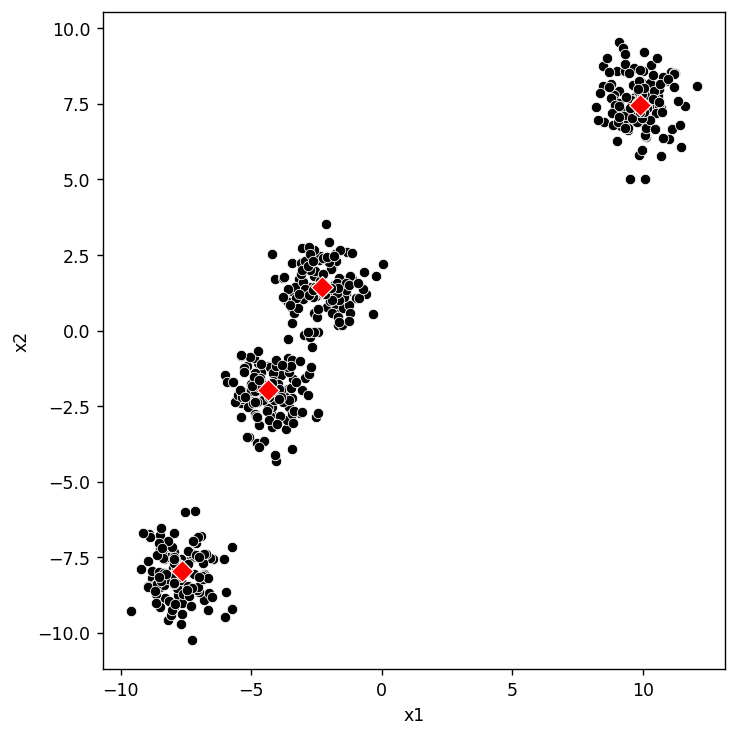

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=125)
sns.scatterplot(data=df_blobs, x="x1", y="x2", color="black")
sns.scatterplot(data=df_centers, x="x1", y="x2", color="red", marker="D", s=80)
plt.tight_layout()
plt.show()

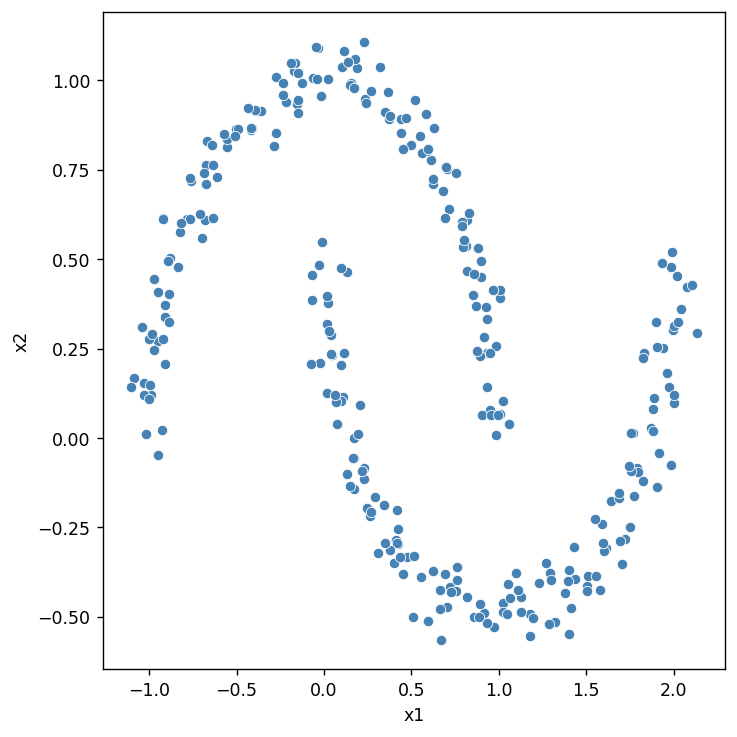

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=125)
sns.scatterplot(data=df_moons, x="x1", y="x2", color="steelblue")
# sns.scatterplot(data=df_centers, x="x1", y="x2", color="red", marker="D", s=80)
plt.tight_layout()
plt.show()

## 3. Clustering with DBSCAN

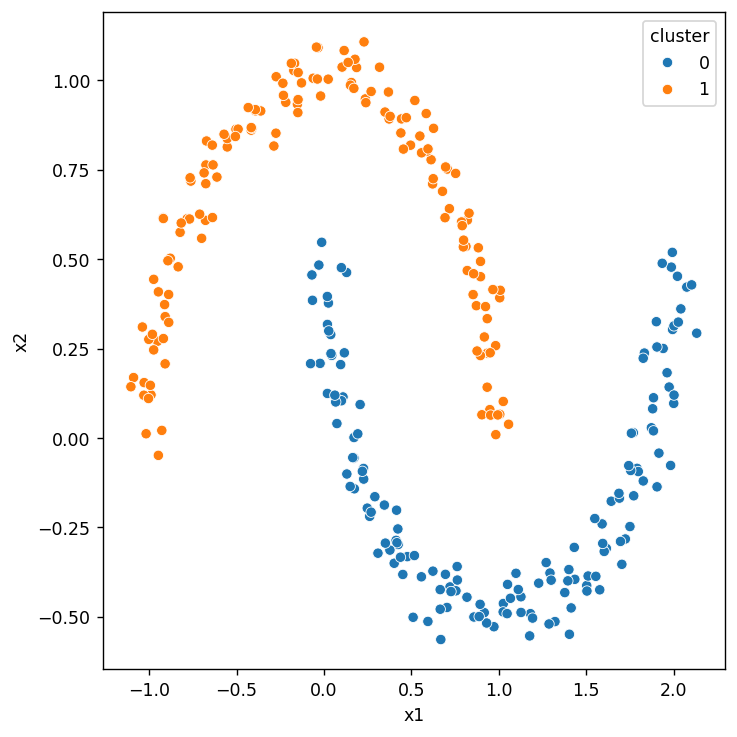

In [ ]:
dbscan_clustering = DBSCAN(eps=0.3, min_samples=3)
y_m_pred = dbscan_clustering.fit_predict(x_m)
df_moons["cluster"] = y_m_pred
fig = plt.figure(figsize=(6, 6), dpi=125)
sns.scatterplot(data=df_moons, x="x1", y="x2", hue="cluster")
plt.tight_layout()
plt.show()

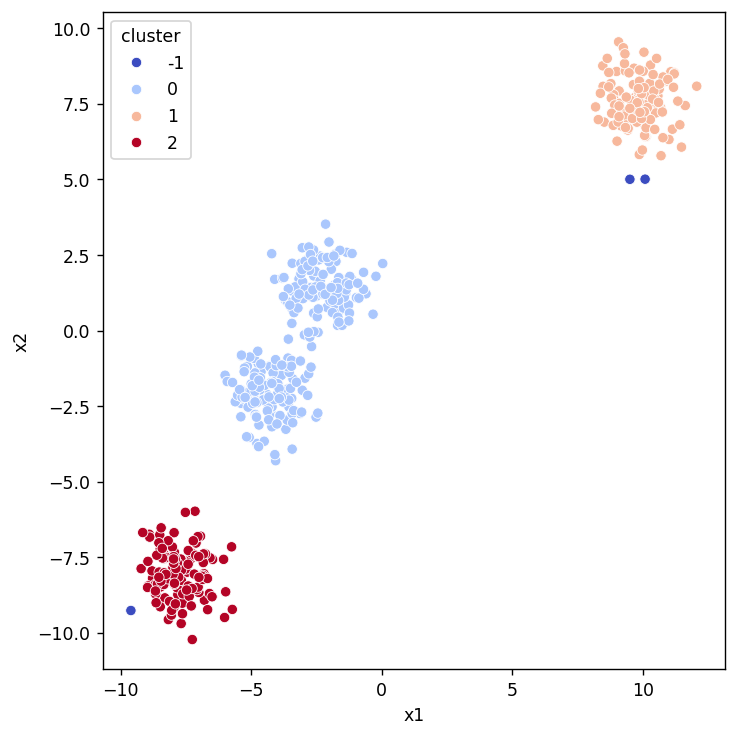

In [ ]:
dbs = DBSCAN(eps=0.9, min_samples=10)
y_pred = dbs.fit_predict(x)
df_blobs["cluster"] = y_pred
fig = plt.figure(figsize=(6, 6), dpi=125)
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster", palette="coolwarm")
plt.tight_layout()
plt.show()

## 4. Finding hyperparameters out.

### 4.1 Knee rule (empirical)

This rule makes use of `Neighbors` and `Distance` methods where the number of neighbors is set to a number close to the double of the number of features.

In [ ]:
from sklearn.neighbors import NearestNeighbors

In our current case, we have two dimensions or features, so we can set the number of neighbors close to `4`, in this case `3`.

In [ ]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(x)
distances, indexes = neighbors_fit.kneighbors(x)

In [ ]:
print(f"Distances dimension: {distances.shape}")

Distances dimension: (500, 3)


In [ ]:
distances = np.sort(distances, axis=0)[:,1]

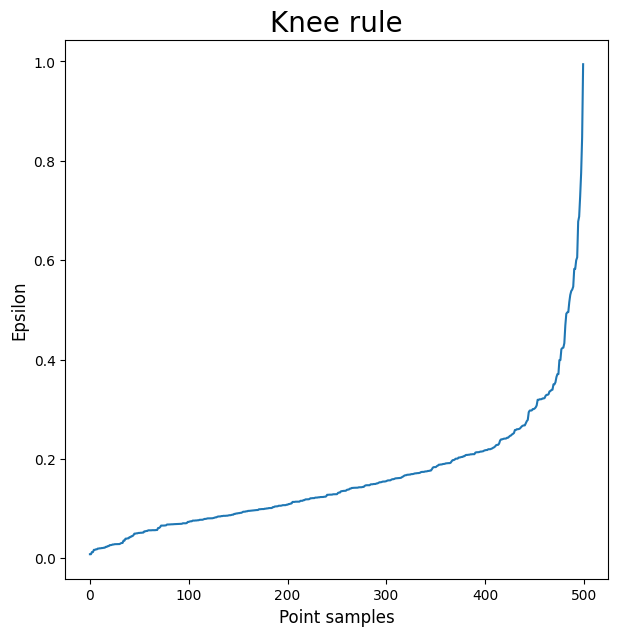

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.plot(distances)
plt.title("Knee rule", fontdict={"fontsize": 20})
plt.xlabel("Point samples", fontdict={"fontsize": 12})
plt.ylabel("Epsilon", fontdict={"fontsize": 12})
plt.show()

In [ ]:
from itertools import product

eps_values = np.arange(0.25, 0.8, 0.10) 
min_samples = np.arange(2,10)

# Zipping eps and min_samples
dbscan_params = list(product(eps_values, min_samples))
sil_scores = []

# Finding optimal Silhouette scores
for p in dbscan_params:
    dbs = DBSCAN(eps=p[0], min_samples=p[1])
    y_pred = dbs.fit_predict(x)
    sil_scores.append(silhouette_score(x, y_pred)) 

In [ ]:
print(dbscan_params)

[(0.25, 2), (0.25, 3), (0.25, 4), (0.25, 5), (0.25, 6), (0.25, 7), (0.25, 8), (0.25, 9), (0.35, 2), (0.35, 3), (0.35, 4), (0.35, 5), (0.35, 6), (0.35, 7), (0.35, 8), (0.35, 9), (0.44999999999999996, 2), (0.44999999999999996, 3), (0.44999999999999996, 4), (0.44999999999999996, 5), (0.44999999999999996, 6), (0.44999999999999996, 7), (0.44999999999999996, 8), (0.44999999999999996, 9), (0.5499999999999999, 2), (0.5499999999999999, 3), (0.5499999999999999, 4), (0.5499999999999999, 5), (0.5499999999999999, 6), (0.5499999999999999, 7), (0.5499999999999999, 8), (0.5499999999999999, 9), (0.6499999999999999, 2), (0.6499999999999999, 3), (0.6499999999999999, 4), (0.6499999999999999, 5), (0.6499999999999999, 6), (0.6499999999999999, 7), (0.6499999999999999, 8), (0.6499999999999999, 9), (0.7499999999999999, 2), (0.7499999999999999, 3), (0.7499999999999999, 4), (0.7499999999999999, 5), (0.7499999999999999, 6), (0.7499999999999999, 7), (0.7499999999999999, 8), (0.7499999999999999, 9)]


In [ ]:
df_params_tunning = pd.DataFrame.from_records(
    dbscan_params,
    columns=["eps", "min_samples"]
)

df_params_tunning["sil_scores"] = sil_scores
df_params_tunning.head()

,eps,min_samples,sil_scores
0,0.25,2,0.015631
1,0.25,3,-0.062516
2,0.25,4,-0.097941
3,0.25,5,-0.176306
4,0.25,6,-0.295328


In [ ]:
pivot = pd.pivot_table(
    df_params_tunning,
    values="sil_scores",
    index="min_samples",
    columns="eps",
)
pivot

eps,0.25,0.35,0.45,0.55,0.65,0.75
min_samples,,,,,,
2,0.015631,0.030267,0.192110,0.481808,0.467321,0.476287
3,-0.062516,0.181391,0.464585,0.604618,0.731680,0.743049
4,-0.097941,0.045491,0.435817,0.599043,0.726550,0.743049
5,-0.176306,0.236427,0.482421,0.577225,0.717843,0.742895
6,-0.295328,0.299137,0.471646,0.652100,0.717843,0.737783
7,-0.353730,0.122809,0.434768,0.505844,0.717843,0.728682
8,-0.529509,-0.032674,0.502974,0.485337,0.698639,0.721358
9,-0.610597,-0.073131,0.489543,0.600058,0.673814,0.721358


In [ ]:
opt_params = df_params_tunning[df_params_tunning["sil_scores"] == df_params_tunning["sil_scores"].max()]

In [ ]:
tuple(opt_params[["eps", "min_samples"]].iloc[0,:].values)

(0.7499999999999999, 3.0)

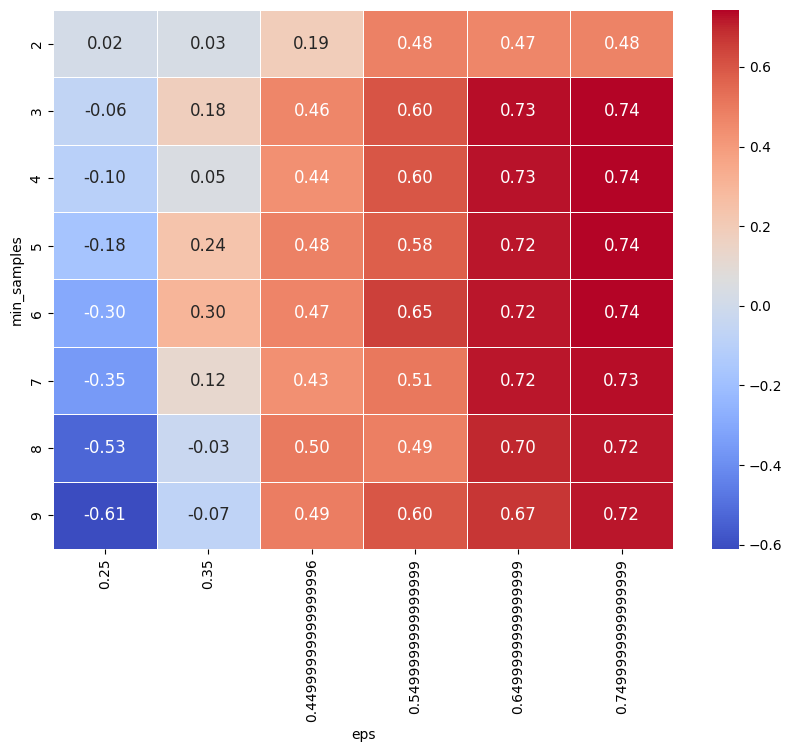

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(
    pivot,
    annot=True,
    ax=ax,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"fontsize": 12},
)
plt.show()

### 4.2 Evaluating optimal eps and distance values.

From the heatmap we can see that the optimal values of `eps` and `min_samples` are `0.75` and `3` respectively.

In [ ]:
dbscan_opt = DBSCAN(eps=0.75, min_samples=3)
y_pred = dbscan_opt.fit_predict(x)
print(f"Silhouette Coefficient: {silhouette_score(x, y_pred)}")

Silhouette Coefficient: 0.7430493430071711


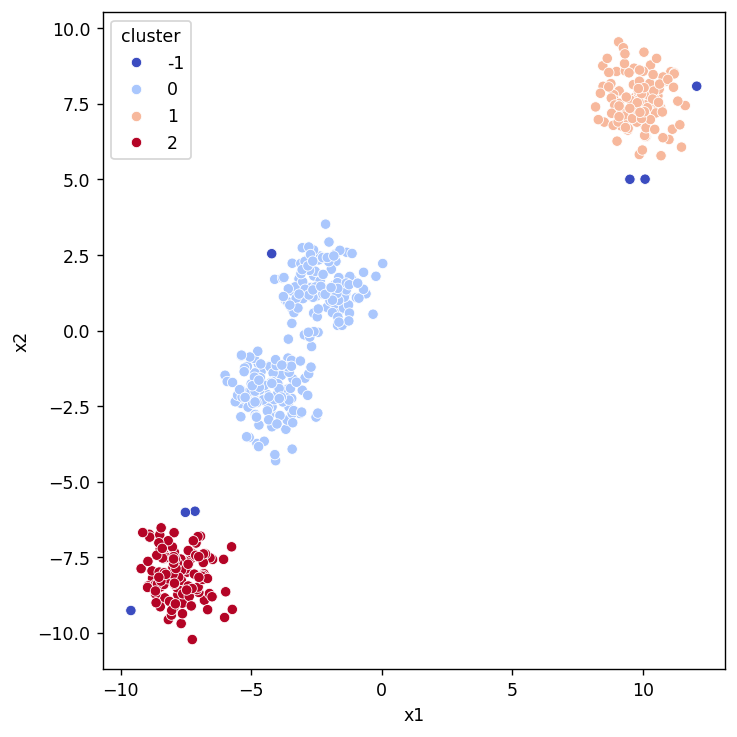

In [ ]:
df_blobs["cluster"] = y_pred
fig = plt.figure(figsize=(6, 6), dpi=125)
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster", palette="coolwarm")
plt.tight_layout()
plt.show()

For n_clusters = 4 The average silhouette_score is : 0.7430493430071711


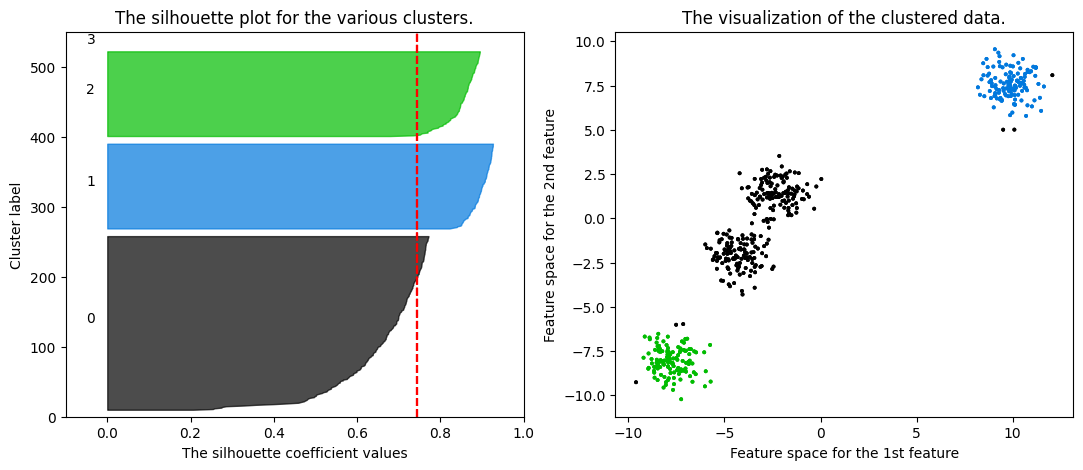

In [ ]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(13, 5) 

# The 1st subplot is the Silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]

ax1.set_xlim([-0.1, 1])

# Initialize the clusterer with DBSCAN clustering
clusterer = DBSCAN(eps=0.75, min_samples=3, metric="euclidean")
clusterer_labels = clusterer.fit_predict(x)
n_clusters = len(np.unique(clusterer_labels))

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])  

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = silhouette_score(x, clusterer_labels)
print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(x, clusterer_labels)

y_lower = 10
for i in range(n_clusters):

    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[clusterer_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(clusterer_labels.astype(float) / n_clusters)
    ax2.scatter(
            x= x[:, 0],
            y= x[:, 1],
            marker=".",
            s=30,
            lw=0,
            alpha=0.7,
            c=colors,
            edgecolor="k",
        )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49a4b13f-b86e-4dbe-8cae-5dc522a92da6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>